# 0. Introduction

**Dataset**  
* [abalone(전복)](https://github.com/MyungKyuYi/AI-class/blob/main/abalone.csv)

**Environment**
* macOS `x86`cpu

**Framework**  
* TensorFlow: Version `2.10.0`

**Dependencies**  
* Python: Version `3.9.19`
* Numpy: Version `1.24.3`
* Pandas: Version `2.2.2`
* Matplotlib: Version `3.9.2`
* scikit-learn: Version `1.2.2`

**Purpose**  
* 전복 데이터를 가지고, ~머신러닝 분류~, ~회귀~ / 신경망 분류, ~회귀~를 각각 수행하라. 레이블은 둘다 Ring

## 0.1. Load the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('./datasets/abalone.csv')
df

id Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0        0   M   0.455     0.365   0.095        0.5140          0.2245   
1        1   M   0.350     0.265   0.090        0.2255          0.0995   
2        2   F   0.530     0.420   0.135        0.6770          0.2565   
3        3   M   0.440     0.365   0.125        0.5160          0.2155   
4        4   I   0.330     0.255   0.080        0.2050          0.0895   
...    ...  ..     ...       ...     ...           ...             ...   
4172  4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173  4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174  4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175  4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176  4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 10 columns]

In [3]:
# 1. 일단 'id' column은 지운다
df = df.drop('id', axis=1)
df

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

In [4]:
# dataset의 shape, columns 확인
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns}")

# 해당 dataset은 column의 수가 많지 않지만, 수십 개의 columns가 존재하는 경우라면,
# df나 df.describe()로 한 눈에 확인하기 어려움

Shape: (4177, 9)
Columns: Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')


In [5]:
# columns description
'''
| Sex               | 
| Length            | 
| Diameter          | 
| Height            | 
| Whole_weight      | 
| Shucked_weight    | 
| Viscera_weight    | 
| Shell_weight      |
| Rings(Label)      | 
'''

'\n| Sex               | \n| Length            | \n| Diameter          | \n| Height            | \n| Whole_weight      | \n| Shucked_weight    | \n| Viscera_weight    | \n| Shell_weight      |\n| Rings(Label)      | \n'

In [6]:
# missing value를 확인하는 방법 두 가지
# sol1. DataFrame.info()는 Non-Null Count & Dtype을 리턴함
print(df.info())
print("\n\n")
# sol2. DataFrame.isnull().sum()은 Null Count를 리턴함 -> Null 확인에는 더 직관적임
print(df.isnull().sum())
print("\n\n")

# 또한 이를 응용하여 dataset 전체에 null이 존재하는지 여부를 출력하는 if statement를 작성 가능
if (df.isnull().sum().sum() == 0): print("There are no missing values.")
print("\n\n")

# 또한 이를 응용하여 null이 존재한다면 자동으로 처리하는 if statement를 작성 가능
# 해당 예제에서는 missing value를 '제거'하도록 작성함. 이외에도 missing value 처리 방법은 다양함
if (df.isnull().sum().sum() == 0):
    print("There are no missing values.")
else:
    print("missing values가 존재하여 처리합니다. \n처리 방법: 삭제")
    df = df.dropna()

# 해당 dataset에는 missing value가 존재하지 않기 때문에 별도로 작동하지는 않음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None



Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64



There are no missing values.



There are no missing values.


> **cf. [pandas.DataFrame.dropna — pandas 2.2.2 documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)**  
`DataFrame.dropna(*, axis=0, how=_NoDefault.no_default, thresh=_NoDefault.no_default, subset=None, inplace=False, ignore_index=False)`  
Remove missing values.

> **cf. [누락 데이터(Missing value)를 처리하는 7가지 방법 / Data Imputation - 밥먹는 개발자](https://dining-developer.tistory.com/19)**

In [7]:
# Sex에 대해서 missing value도 없음을 확인했으니 numeric하게 바꾸자

# categorical value를 각각 int에 mapping
np.unique(df['Sex']) # prints 'F', 'I', 'M'
sex_mapping = {'M': 0, 'F': 1, 'I': 2} # I는 성별을 구분할 수 없는 '유아기'를 의미함
df['Sex'] = df['Sex'].map(sex_mapping)

df

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0       0   0.455     0.365   0.095        0.5140          0.2245   
1       0   0.350     0.265   0.090        0.2255          0.0995   
2       1   0.530     0.420   0.135        0.6770          0.2565   
3       0   0.440     0.365   0.125        0.5160          0.2155   
4       2   0.330     0.255   0.080        0.2050          0.0895   
...   ...     ...       ...     ...           ...             ...   
4172    1   0.565     0.450   0.165        0.8870          0.3700   
4173    0   0.590     0.440   0.135        0.9660          0.4390   
4174    0   0.600     0.475   0.205        1.1760          0.5255   
4175    1   0.625     0.485   0.150        1.0945          0.5310   
4176    0   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

In [8]:
# DataFrame.describe()는 dataset에 대한 statistical values를 제공함
df.describe()

Sex       Length     Diameter       Height  Whole_weight  \
count  4177.000000  4177.000000  4177.000000  4177.000000   4177.000000   
mean      0.955470     0.523992     0.407881     0.139516      0.828742   
std       0.827815     0.120093     0.099240     0.041827      0.490389   
min       0.000000     0.075000     0.055000     0.000000      0.002000   
25%       0.000000     0.450000     0.350000     0.115000      0.441500   
50%       1.000000     0.545000     0.425000     0.140000      0.799500   
75%       2.000000     0.615000     0.480000     0.165000      1.153000   
max       2.000000     0.815000     0.650000     1.130000      2.825500   

       Shucked_weight  Viscera_weight  Shell_weight        Rings  
count     4177.000000     4177.000000   4177.000000  4177.000000  
mean         0.359367        0.180594      0.238831     9.933684  
std          0.221963        0.109614      0.139203     3.224169  
min          0.001000        0.000500      0.001500     1.000000  
25%          0.186000        0.093500      0.130000     8.000000  
50%          0.336000        0.171000      0.234000     9.000000  
75%          0.502000        0.253000      0.329000    11.000000  
max          1.488000        0.760000      1.005000    29.000000

In [9]:
# Label의 class 종류 및 count 확인
# `return_counts` parameter를 사용하여 각 Label의 count도 확인
labels = np.unique(df['Rings'], return_counts=True)
print(labels)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29]), array([  1,   1,  15,  57, 115, 259, 391, 568, 689, 634, 487, 267, 203,
       126, 103,  67,  58,  42,  32,  26,  14,   6,   9,   2,   1,   1,
         2,   1]))


> **cf. [numpy.unique — NumPy v2.1 Manual](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)**  
Find the unique elements of an array.  
Returns the sorted unique elements of an array.  
There are three optional outputs in addition to the unique elements:  
> * the indices of the input array that give the unique values
> * the indices of the unique array that reconstruct the input array
> * the number of times each unique value comes up in the input array

In [10]:
# Check the label count - sol1. numeric table
print("\n<label count>")
table = np.vstack(labels).T
print("Rings  count")
for row in table:
    print(f"{row[0]:5d} {row[1]:6d}")

# problem 1. label이 0부터 시작하지 않는다.
# problem 2. label에 빈 공간이 있다(28).


<label count>
Rings  count
    1      1
    2      1
    3     15
    4     57
    5    115
    6    259
    7    391
    8    568
    9    689
   10    634
   11    487
   12    267
   13    203
   14    126
   15    103
   16     67
   17     58
   18     42
   19     32
   20     26
   21     14
   22      6
   23      9
   24      2
   25      1
   26      1
   27      2
   29      1


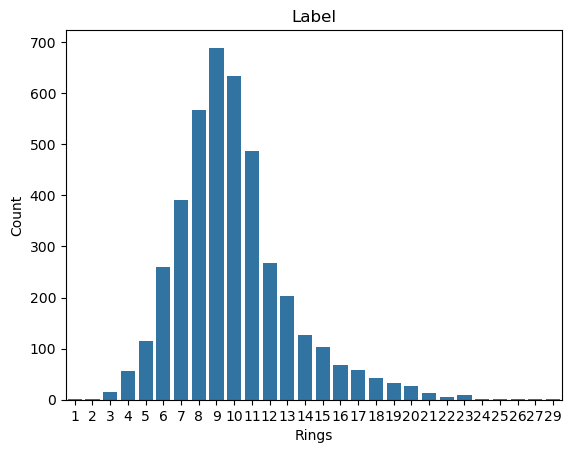

In [11]:
# Check the label count - sol2. graph
sns.countplot(data=df, x='Rings')
plt.xlabel('Rings')
plt.ylabel('Count')
plt.title('Label')
plt.show()

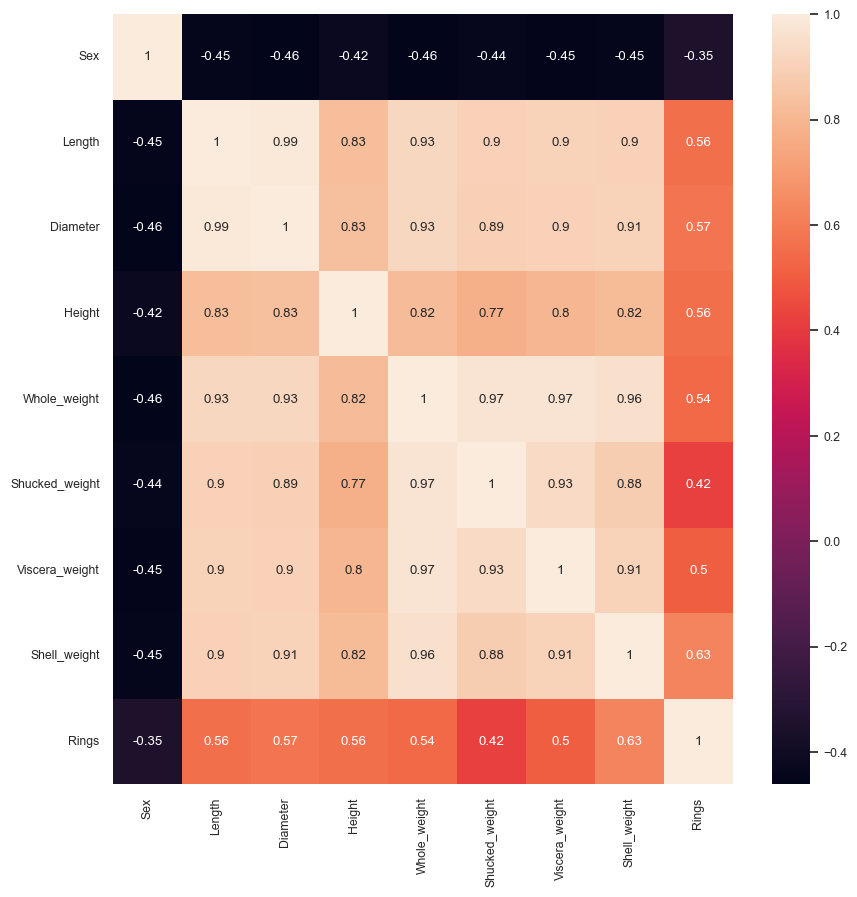

In [12]:
# Check the correlations(1) by heatmap
# If corr >= 0.3, positive-correlated and if corr >= 0.7, high correlated
# If corr <= -0.3, negative-correlated and if corr <= -0.7, high correlated
df_corr = df.corr()

plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(data=df_corr, annot=True)
plt.show()

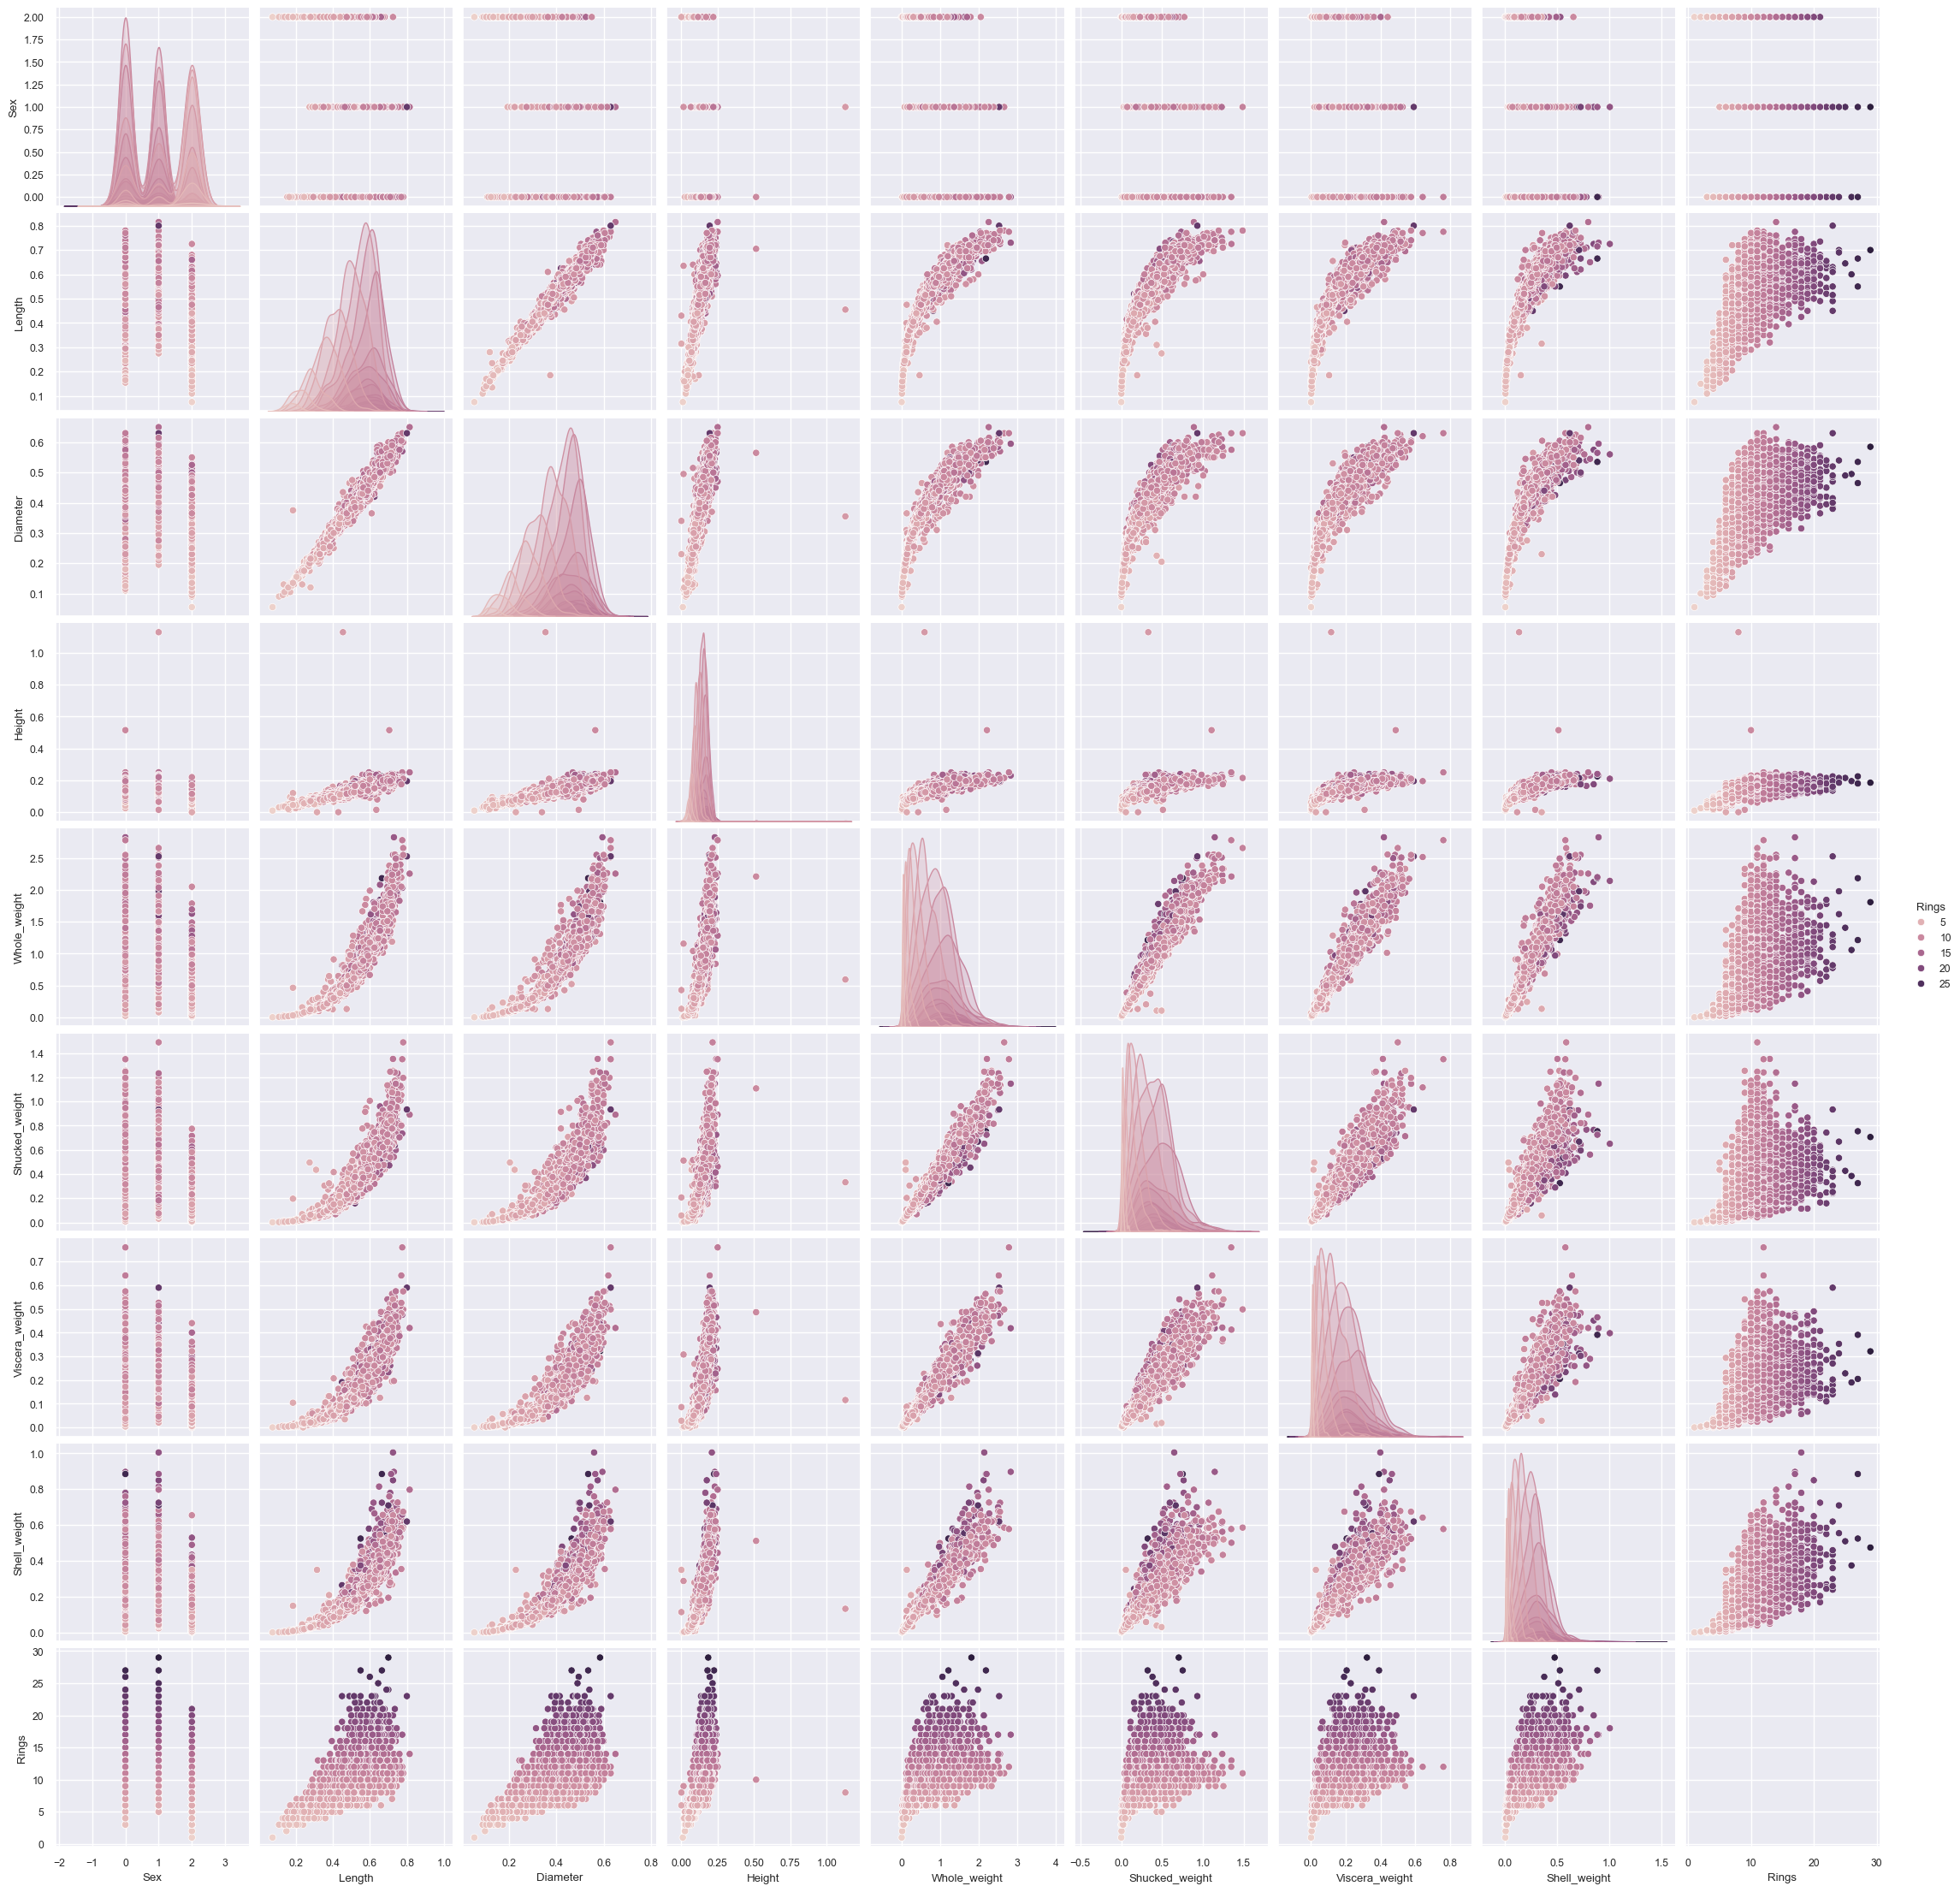

In [13]:
# Check the correlations(2) by pairplot
  # 'Rings'에 대해 구분
sns.pairplot(data=df,
             vars=['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
                   'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
             hue='Rings')
plt.show()

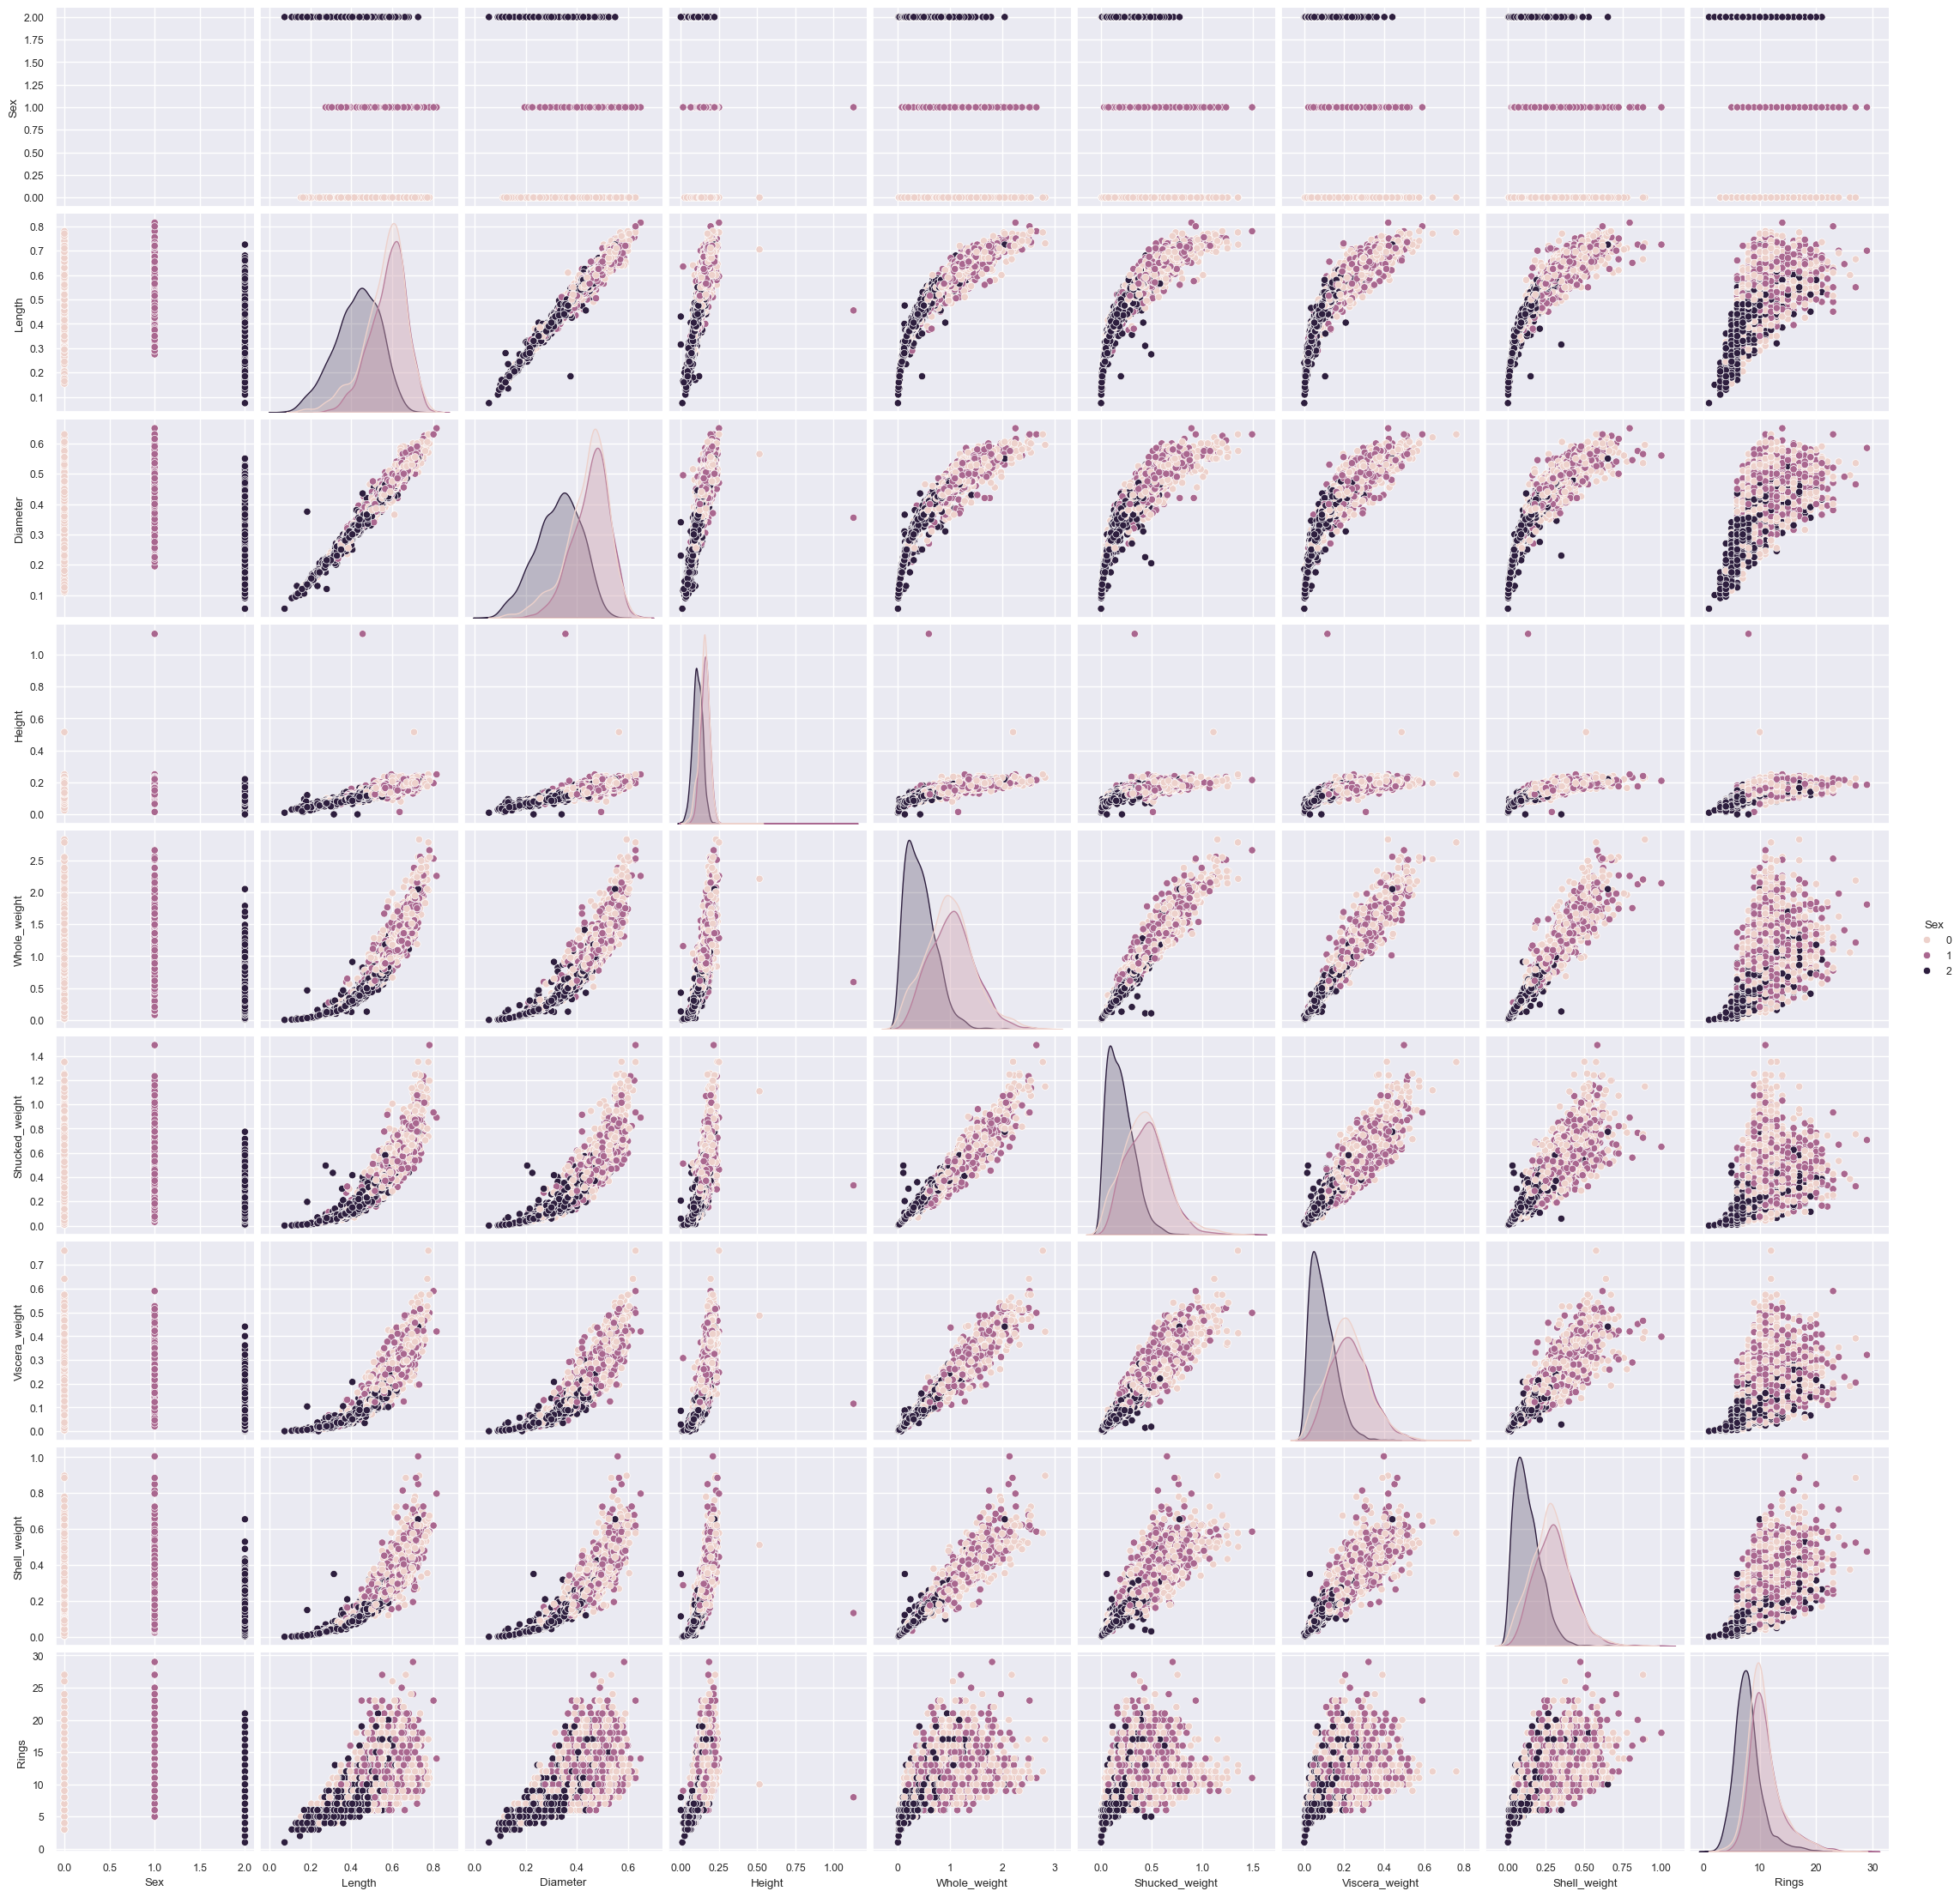

In [14]:
# Check the correlations(2) by pairplot
  # 'Sex'에 대해 구분
sns.pairplot(data=df,
             vars=['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
                   'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
             hue='Sex')
plt.show()

In [15]:
# one-hot encoding for 'Rings'
  # 그 전에 label이 연속적으로 존재하지 않는 문제를 해결
labels = np.unique(df['Rings'], return_counts=True)

# Check the label count - sol1. numeric table
print("\n<label count>")
table = np.vstack(labels).T
print("Rings  count")
for row in table:
    print(f"{row[0]:5d} {row[1]:6d}")

# 0부터 시작하지도 않고, 28이 비어 있음


<label count>
Rings  count
    1      1
    2      1
    3     15
    4     57
    5    115
    6    259
    7    391
    8    568
    9    689
   10    634
   11    487
   12    267
   13    203
   14    126
   15    103
   16     67
   17     58
   18     42
   19     32
   20     26
   21     14
   22      6
   23      9
   24      2
   25      1
   26      1
   27      2
   29      1


In [16]:
# one-hot encoding for 'Rings'
  # 인코딩 전에 기존 label 및 count 정보를 저장
  # 저장 로직 구현
tmp_list = []
tmp_list.append("<label count>")
tmp_list.append("Rings  count")
for row in table:
    tmp_list.append((f"{row[0]:5d} {row[1]:6d}"))

# 저장 로직 확인용 출력
tmp_list

['<label count>',
 'Rings  count',
 '    1      1',
 '    2      1',
 '    3     15',
 '    4     57',
 '    5    115',
 '    6    259',
 '    7    391',
 '    8    568',
 '    9    689',
 '   10    634',
 '   11    487',
 '   12    267',
 '   13    203',
 '   14    126',
 '   15    103',
 '   16     67',
 '   17     58',
 '   18     42',
 '   19     32',
 '   20     26',
 '   21     14',
 '   22      6',
 '   23      9',
 '   24      2',
 '   25      1',
 '   26      1',
 '   27      2',
 '   29      1']

In [17]:
# one-hot encoding for 'Rings'
  # 기존 label 및 count 정보를 저장 - write to file
with open('./abalone_label_numbering_origin.txt', 'w') as f:
    for line in tmp_list:
        f.write(line)
        f.write('\n')

In [18]:
# one-hot encoding for 'Rings'
  # 이제 빈 곳 없이 새롭게 labeling
  # step1. 일단 연산 쉽게 하기 위해서 `29`를 `28`로 매핑
rings_mapping = {29: 28}

df['Rings'] = df['Rings'].replace(rings_mapping)
np.unique(df['Rings'])

# 이제 1 ~ 28 까지는 빈 클래스 없이 존재한다
# 남은 문제는 0이 존재하지 않는다는 것, 따라서 0 ~ 27로 매핑 필요함(다음 cell)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [19]:
# one-hot encoding for 'Rings'
  # 이제 빈 곳 없이 새롭게 labeling
  # step2. 1 ~ 28을 0 ~ 27로 mapping - sol1.
rings_mapping = {}
for i in range(len(np.unique(df['Rings']))): # 0 ~ 27
    rings_mapping = {i+1: i} # 1을 0에 매핑, 2를 1에 매핑, ...
    # ㄴ mapping dict에 한 번에 추가하고 replace하면 2에서 1로 매핑된 애가
    # ㄴ 또 1에서 0으로 매핑되는 문제가 생기지 않을까 싶어서 매 번 초기화하고
    # ㄴ loop마다 한 개의 label에 대한 mapping만 수행되도록 했음
    # ㄴ 하지만 알고보니 다음과 같다고 함.
    #   ㄴ 매핑 순서가 상관없이 모든 값이 딕셔너리에 정의된 대로 바뀌며, 
    #   ㄴ 한 번 바뀐 값은 다시 변경되지 않습니다.
    df['Rings'] = df['Rings'].replace(rings_mapping)

labels = np.unique(df['Rings'], return_counts=True)
print("\n<label count>")
table = np.vstack(labels).T
print("Rings  count")
for row in table:
    print(f"{row[0]:5d} {row[1]:6d}")

# success


<label count>
Rings  count
    0      1
    1      1
    2     15
    3     57
    4    115
    5    259
    6    391
    7    568
    8    689
    9    634
   10    487
   11    267
   12    203
   13    126
   14    103
   15     67
   16     58
   17     42
   18     32
   19     26
   20     14
   21      6
   22      9
   23      2
   24      1
   25      1
   26      2
   27      1


In [20]:
'''
# one-hot encoding for 'Rings'
  # 이제 빈 곳 없이 새롭게 labeling
  # step2. 1 ~ 28을 0 ~ 27로 mapping - sol2.
  # 둘 중 하나만 진행하면 됨

rings_mapping = {}

# mapping dict 만들기
for i in range(len(np.unique(df['Rings']))): # 0 ~ 27
    rings_mapping[i+1] = i # {i+1: i}로 추가됨
df['Rings'] = df['Rings'].replace(rings_mapping)

labels = np.unique(df['Rings'], return_counts=True)
print("\n<label count>")
table = np.vstack(labels).T
print("Rings  count")
for row in table:
    print(f"{row[0]:5d} {row[1]:6d}")

# success
'''

'\n# one-hot encoding for \'Rings\'\n  # 이제 빈 곳 없이 새롭게 labeling\n  # step2. 1 ~ 28을 0 ~ 27로 mapping - sol2.\n  # 둘 중 하나만 진행하면 됨\n\nrings_mapping = {}\n\n# mapping dict 만들기\nfor i in range(len(np.unique(df[\'Rings\']))): # 0 ~ 27\n    rings_mapping[i+1] = i # {i+1: i}로 추가됨\ndf[\'Rings\'] = df[\'Rings\'].replace(rings_mapping)\n\nlabels = np.unique(df[\'Rings\'], return_counts=True)\nprint("\n<label count>")\ntable = np.vstack(labels).T\nprint("Rings  count")\nfor row in table:\n    print(f"{row[0]:5d} {row[1]:6d}")\n\n# success\n'

In [21]:
# one-hot encoding for 'Rings'
  # 이제 one-hot encoding 진행
def one_hot_encoding(label_array):
    label_length = len(label_array)
    label_array_onehot = []
    for i in range(label_length):
        # Output: [[0, 0, ..., 0], [0, 0, ..., 0], ...]
        label_array_onehot.append([0] * len(np.unique(label_array)))

    for j in range(label_length):
        hot_idx = int(label_array[j])        # 각 label에 맞는 자리 탐색
        label_array_onehot[j][hot_idx] = 1   # 탐색한 자리에 1 채우기

    return np.array(label_array_onehot)

y = df['Rings'] # 위에서 mapping 변환을 df에서 진행해서 y를 다시 정의
y_onehot = one_hot_encoding(y)
print(f"y_onehot.head: \n{type(y_onehot)} \n{y_onehot[:5]}")

# 다음과 같은 방법으로 간단하게도 가능함
# y_onehot = tf.keras.utils.to_categorical(y)

y_onehot.head: 
<class 'numpy.ndarray'> 
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [22]:
# Split the dataset into features(X) and label(y)
  # y에 대해서는 위 cell에서 진행했음
X = df.drop('Rings', axis=1).to_numpy()

> **cf. [pandas.DataFrame.drop — pandas 2.2.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)**  
Drop specified labels from rows or columns.  
Remove rows or columns by specifying label names and corresponding axis, or by directly specifying index or column names. When using a multi-index, labels on different levels can be removed by specifying the level. See the user guide for more information about the now unused levels.    
**cf. [09-04. 행/열 삭제 (drop) - [Python 완전정복 시리즈] 2편 : Pandas DataFrame 완전정복](https://wikidocs.net/154050)**

> **cf. [pandas.DataFrame.to_numpy — pandas 2.2.2 documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html)**  
Convert the DataFrame to a NumPy array.  
By default, the dtype of the returned array will be the common NumPy dtype of all types in the DataFrame. For example, if the dtypes are float16 and float32, the results dtype will be float32. This may require copying data and coercing values, which may be expensive.
>    > **`.to_numpy()` 대신에 `.values`를 사용하는 코드들도 존재한다.**  
>    > **cf. [DOC: warning against use of .values should show difference compared to to_numpy()/array · Issue #48425 · pandas-dev/pandas](https://github.com/pandas-dev/pandas/issues/48425)**  
>    > Both methods will produce the same output. However, `.to_numpy()` is preferred for its flexibility and better integration with Pandas.

In [23]:
# 최종 확인
print(f"X: \n  type: {type(X)} \n  shape: {X.shape}")
print(f"X.head: \n{X[:5]} \n")
print(f"y_onehot: \n  type: {type(y_onehot)} \n  shape: {y_onehot.shape}")
print(f"y_onehot.head: \n{y_onehot[:5]} \n")

X: 
  type: <class 'numpy.ndarray'> 
  shape: (4177, 8)
X.head: 
[[0.     0.455  0.365  0.095  0.514  0.2245 0.101  0.15  ]
 [0.     0.35   0.265  0.09   0.2255 0.0995 0.0485 0.07  ]
 [1.     0.53   0.42   0.135  0.677  0.2565 0.1415 0.21  ]
 [0.     0.44   0.365  0.125  0.516  0.2155 0.114  0.155 ]
 [2.     0.33   0.255  0.08   0.205  0.0895 0.0395 0.055 ]] 

y_onehot: 
  type: <class 'numpy.ndarray'> 
  shape: (4177, 28)
y_onehot.head: 
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]] 



In [24]:
# Split the dataset into train_set and test_set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot,
                                                    test_size=0.1,
                                                    shuffle=True,
                                                    random_state=42)

print(f"X_train: Shape {X_train.shape} \nX_test:  Shape {X_test.shape}")
print(f"y_train: Shape {y_train.shape} \ny_test:  Shape {y_test.shape}")

# label Class 중에 count가 1인 Class가 존재해서 `stratify` parameter는 사용할 수 없음
  # ValueError: The least populated class in y has only 1 member which is 
  # too few. The minimum number of groups for any class cannot be less than 2.

X_train: Shape (3759, 8) 
X_test:  Shape (418, 8)
y_train: Shape (3759, 28) 
y_test:  Shape (418, 28)


In [25]:
# Standardize the features scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"X_train.head \n{X_train[:5]} \n")
print(f"X_train_scaled.head \n{X_train_scaled[:5]}")

X_train.head 
[[1.     0.645  0.51   0.155  1.129  0.5015 0.24   0.342 ]
 [0.     0.615  0.47   0.165  1.128  0.4465 0.2195 0.34  ]
 [1.     0.44   0.345  0.105  0.4285 0.165  0.083  0.132 ]
 [1.     0.72   0.55   0.2    1.9965 0.9035 0.469  0.5215]
 [0.     0.6    0.46   0.155  0.6655 0.285  0.149  0.269 ]] 

X_train_scaled.head 
[[ 0.05242298  1.00690692  1.02834054  0.36264344  0.60804949  0.63050411
   0.54105162  0.73633247]
 [-1.15652171  0.75633561  0.62445562  0.59940882  0.60601791  0.38465603
   0.3542367   0.72200956]
 [ 0.05242298 -0.70533034 -0.63768476 -0.82118348 -0.81507008 -0.87363918
  -0.88967728 -0.7675731 ]
 [ 0.05242298  1.63333518  1.43222546  1.42808767  2.37044239  2.42743013
   2.62791097  2.02181366]
 [-1.15652171  0.63104996  0.52348439  0.36264344 -0.33358637 -0.33724336
  -0.28822437  0.21354625]]


> **cf. [StandardScaler — scikit-learn 1.5.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)**  
Standardize features by removing the mean and scaling to unit variance.  
The standard score of a sample x is calculated as:  
$ z = \frac{x-u}{s} $  
> * $z$: 표준화된 값
> * $x$: 표준화할 값
> * $u$: mean of the training samples
> * $s$: the standard deviation of the training samples

# (추가)Accuracy 높이기

기존 accuracy는 0.3이하를 기록한다.  
overfitting이라도 해보려 시도해도 train set 조차 0.5 이상의 accuracy가 나오지 않는다.  
따라서 다음과 같은 시도를 해볼 수 있다.  
**data handling**  
* feature engineering
* ~standardization(이미 함)~

**model handling**
* model complexity 높이기
* hyperparameter tuning

대충 진행하다 보니까 model handling은 별 의미가 없고, data 자체를 조금 handling할 필요가 있어 보인다.  
-> 높이기 실패함.

In [26]:
# feature engineering
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

print(f"X_train.shape: {X_train.shape}")
print(f"X_train.head \n{X_train[:5]} \n")
print(f"X_train_poly.shape: {X_train_poly.shape}")
print(f"X_train_poly.head \n{X_train_poly[:5]}")

X_train.shape: (3759, 8)
X_train.head 
[[1.     0.645  0.51   0.155  1.129  0.5015 0.24   0.342 ]
 [0.     0.615  0.47   0.165  1.128  0.4465 0.2195 0.34  ]
 [1.     0.44   0.345  0.105  0.4285 0.165  0.083  0.132 ]
 [1.     0.72   0.55   0.2    1.9965 0.9035 0.469  0.5215]
 [0.     0.6    0.46   0.155  0.6655 0.285  0.149  0.269 ]] 

X_train_poly.shape: (3759, 45)
X_train_poly.head 
[[1.         1.         0.645      0.51       0.155      1.129
  0.5015     0.24       0.342      1.         0.645      0.51
  0.155      1.129      0.5015     0.24       0.342      0.416025
  0.32895    0.099975   0.728205   0.3234675  0.1548     0.22059
  0.2601     0.07905    0.57579    0.255765   0.1224     0.17442
  0.024025   0.174995   0.0777325  0.0372     0.05301    1.274641
  0.5661935  0.27096    0.386118   0.25150225 0.12036    0.171513
  0.0576     0.08208    0.116964  ]
 [1.         0.         0.615      0.47       0.165      1.128
  0.4465     0.2195     0.34       0.         0.         0.
 

# 1. DL

In [27]:
import tensorflow as tf
import tensorflow.keras as keras

2024-09-18 23:27:25.758397: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
# Create the model
model = keras.models.Sequential()

# Add layers
relu = keras.activations.relu
softmax = keras.activations.softmax
model.add(keras.layers.Dense(units=64,
                             activation=relu,
                             name='dense1',
                             input_shape=(45,))) # 기본은 8, poly는 45
model.add(keras.layers.Dense(units=128,
                             activation=relu,
                             name='dense2'))
model.add(keras.layers.Dense(units=200,
                             activation=relu,
                             name='dense3'))
model.add(keras.layers.Dense(units=500,
                             activation=relu,
                             name='dense4'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(units=28,
                             activation=softmax,
                             name='output'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              (None, 64)                2944      
                                                                 
 dense2 (Dense)              (None, 128)               8320      
                                                                 
 dense3 (Dense)              (None, 200)               25800     
                                                                 
 dense4 (Dense)              (None, 500)               100500    
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 output (Dense)              (None, 28)                14028     
                                                                 
Total params: 151,592
Trainable params: 151,592
Non-trai

2024-09-18 23:27:28.127346: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dnn_abalone-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=15,
                                                  restore_best_weights=True)
# history = model.fit(X_train_scaled, y_train,
#                     validation_split=0.2,
#                     batch_size=None,
#                     verbose=2,
#                     epochs=500,
#                     callbacks=[checkpoint_cb, early_stopping_cb])

# history = model.fit(X_train_scaled, y_train,
#                     validation_split=0.2,
#                     batch_size=None,
#                     verbose=2,
#                     epochs=200)

history = model.fit(X_train_poly, y_train,
                    validation_split=0.2,
                    batch_size=None,
                    verbose=2,
                    epochs=200)

Epoch 1/200
94/94 - 1s - loss: 2.9334 - accuracy: 0.1510 - val_loss: 2.5088 - val_accuracy: 0.2128 - 822ms/epoch - 9ms/step
Epoch 2/200
94/94 - 0s - loss: 2.4918 - accuracy: 0.1985 - val_loss: 2.2999 - val_accuracy: 0.2035 - 173ms/epoch - 2ms/step
Epoch 3/200
94/94 - 0s - loss: 2.3704 - accuracy: 0.2172 - val_loss: 2.2240 - val_accuracy: 0.2168 - 169ms/epoch - 2ms/step
Epoch 4/200
94/94 - 0s - loss: 2.3003 - accuracy: 0.2248 - val_loss: 2.1875 - val_accuracy: 0.2327 - 220ms/epoch - 2ms/step
Epoch 5/200
94/94 - 0s - loss: 2.2601 - accuracy: 0.2434 - val_loss: 2.1407 - val_accuracy: 0.2473 - 223ms/epoch - 2ms/step
Epoch 6/200
94/94 - 0s - loss: 2.2327 - accuracy: 0.2241 - val_loss: 2.1197 - val_accuracy: 0.2566 - 290ms/epoch - 3ms/step
Epoch 7/200
94/94 - 0s - loss: 2.2107 - accuracy: 0.2401 - val_loss: 2.1148 - val_accuracy: 0.2354 - 200ms/epoch - 2ms/step
Epoch 8/200
94/94 - 0s - loss: 2.1819 - accuracy: 0.2384 - val_loss: 2.0915 - val_accuracy: 0.2420 - 180ms/epoch - 2ms/step
Epoch 9/

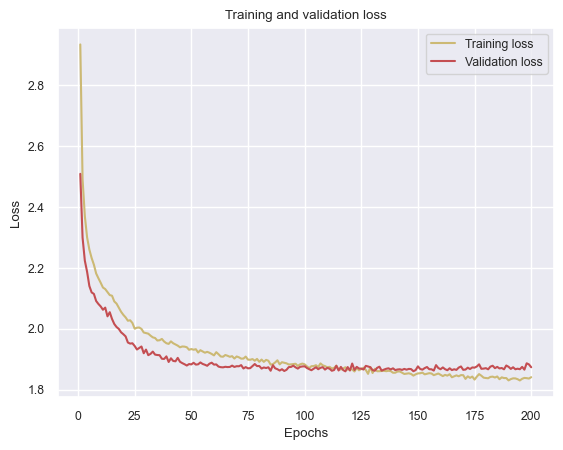

In [30]:
# Epoch에 따른 loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

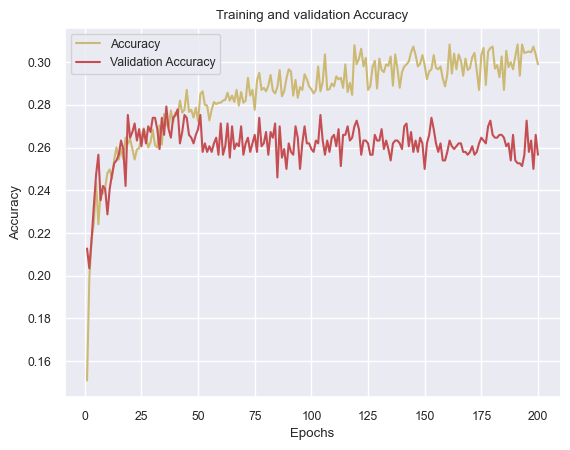

In [31]:
# Epoch에 따른 Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
# 더 자세한 결과 확인
# model.compile()에서 'metrics'를 이용해서도 확인 가능할 것 같지만,
# 일단 배운대로만 진행함

from sklearn.metrics import classification_report, confusion_matrix

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

# y_pred = model(X_test_scaled)
y_pred = model(X_test_poly)
y_pred_probs = softmax(y_pred)
y_pred_class = np.argmax(y_pred_probs, axis=1)
y_test_class = np.argmax(y_test, axis=1)

print(classification_report(y_test_class, y_pred_class,
                            zero_division=0))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         3
           3       0.27      0.80      0.40         5
           4       0.36      0.31      0.33        16
           5       0.40      0.42      0.41        24
           6       0.46      0.40      0.43        45
           7       0.42      0.51      0.46        55
           8       0.37      0.41      0.39        68
           9       0.30      0.24      0.27        66
          10       0.18      0.25      0.21        36
          11       0.17      0.15      0.16        27
          12       0.12      0.18      0.15        22
          13       0.00      0.00      0.00        13
          14       0.00      0.00      0.00        14
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         4
          17       0.00      0.00      0.00         6
          18       0.00      0.00      0.00         2
          19       0.00    

In [33]:
'''cf.
precision   | TP / (TP + FP)
recall      | TP / (TP + FN)
f1-score    | harmonic mean of precision and recall
              (2 * (precision * recall)) / (precision + recall)
              일반적으로 precision과 recall은 trade-off 관계라서 이를 절충할 수 있도록 한 개념임
support     | 각 class의 sample count
accuracy    | (TP + TN) / (TP + TN + FP + FN)
macro avg   | arithmatic mean of precision(각 class들의 precision 평균)
'''

'cf.\nprecision   | TP / (TP + FP)\nrecall      | TP / (TP + FN)\nf1-score    | harmonic mean of precision and recall\n              (2 * (precision * recall)) / (precision + recall)\n              일반적으로 precision과 recall은 trade-off 관계라서 이를 절충할 수 있도록 한 개념임\nsupport     | 각 class의 sample count\naccuracy    | (TP + TN) / (TP + TN + FP + FN)\nmacro avg   | arithmatic mean of precision(각 class들의 precision 평균)\n'

In [34]:
'''cf.
TN  | True Negative(진음성)
FN  | False Negative(위음성)
FP  | False Positive(위양성)
TP  | True Positive(진양성)
'''

'cf.\nTN  | True Negative(진음성)\nFN  | False Negative(위음성)\nFP  | False Positive(위양성)\nTP  | True Positive(진양성)\n'

# Accuracy가 낮게 나온 이유

* 추측1: sampling bias
* 추측2: outliar <- 얘는 그렇게 큰 영향 없을 듯